# Azure Stream Analytics

Iniciando clonando um repositório

In [ ]:
 rm -r dp-203 -f
 git clone https://github.com/MicrosoftLearning/dp-203-azure-data-engineer dp-203

In [ ]:
 cd dp-203/Allfiles/labs/17
 ./setup.ps1

loud Shell e executei o seguinte comando para executar um aplicativo cliente que envia 100 pedidos simulados para os Hubs de Eventos do Azure:

In [ ]:
 node ~/dp-203/Allfiles/labs/17/orderclient

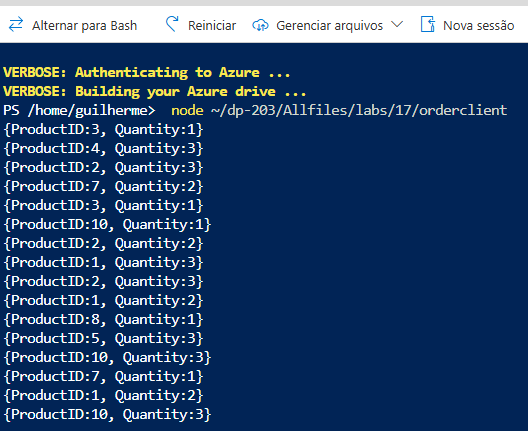

**Criando um trabalho do Azure Stream Analytics**

Azure Stream Analytics para processar os dados de transações de vendas conforme eles chegam ao hub de eventos.

configuração:

Subscription: Your Azure subscription

Resource group: Select the existing dp203-xxxxxxx resource group.

Name: process-orders

Region: Select the region where your other Azure resources are provisioned.

Hosting environment: Cloud

Streaming units: 1

Storage: Add storage account: Unselected

Tags: None

**Criando uma entrada para o fluxo de eventos**

Azure Stream Analytics deve obter dados de entrada do hub de eventos onde os pedidos de vendas são registrados.

adicionando uma entrada do Event Hub com as seguintes propriedades:

Input alias: orders

Select Event Hub from your subscriptions: Selected

Subscription: Your Azure subscription

Event Hub namespace: Select the eventsxxxxxxx Event Hubs namespace

Event Hub name: Select the existing eventhubxxxxxxx event hub.

Event Hub consumer group: Select the existing $Default consumer group

Authentication mode: Create system assigned managed identity

Partition key: Leave blank

Event serialization format: JSON

Encoding: UTF-8

**Crie uma saída para o armazenamento de blobs**

armazenando os dados agregados do pedido de vendas no formato JSON em um contêiner de blobs do Azure Storage.

adicionando uma saída de armazenamento de Blob/ADLS Gen2 com as seguintes propriedades:

Output alias: blobstore

Select Select Blob storage/ADLS Gen2 from your subscriptions from your subscriptions: Selected

Subscription: Your Azure subscription

Storage account: Select the storexxxxxxx storage account

Container: Select the existing data container

Authentication mode: Managed Identity: System assigned

Event serialization format: JSON

Format: Line separated

Encoding: UTF-8

Write mode: Append as results arrive

Path pattern: {date}

Date format: YYYY/MM/DD

Time format: Not applicable

Minimum rows: 20

Maximum time: 0 Hours, 1 minutes, 0 seconds


**Criando uma consulta**

definiu uma entrada e uma saída para seu trabalho do Azure Stream Analytics, agora usar uma consulta para selecionar, filtrar e agregar dados da entrada e enviar os resultados para a saída.

Modifique a consulta padrão da seguinte maneira:

In [ ]:
 SELECT
     DateAdd(second,-10,System.TimeStamp) AS StartTime,
     System.TimeStamp AS EndTime,
     ProductID,
     SUM(Quantity) AS Orders
 INTO
     [blobstore]
 FROM
     [orders] TIMESTAMP BY EventProcessedUtcTime
 GROUP BY ProductID, TumblingWindow(second, 10)
 HAVING COUNT(*) > 1

esta consulta usa o System.Timestamp (com base no campo EventProcessedUtcTime) para definir o início e o fim de cada janela de 10 segundos (sequencial não sobreposta) na qual a quantidade total para cada ID de produto é calculada.

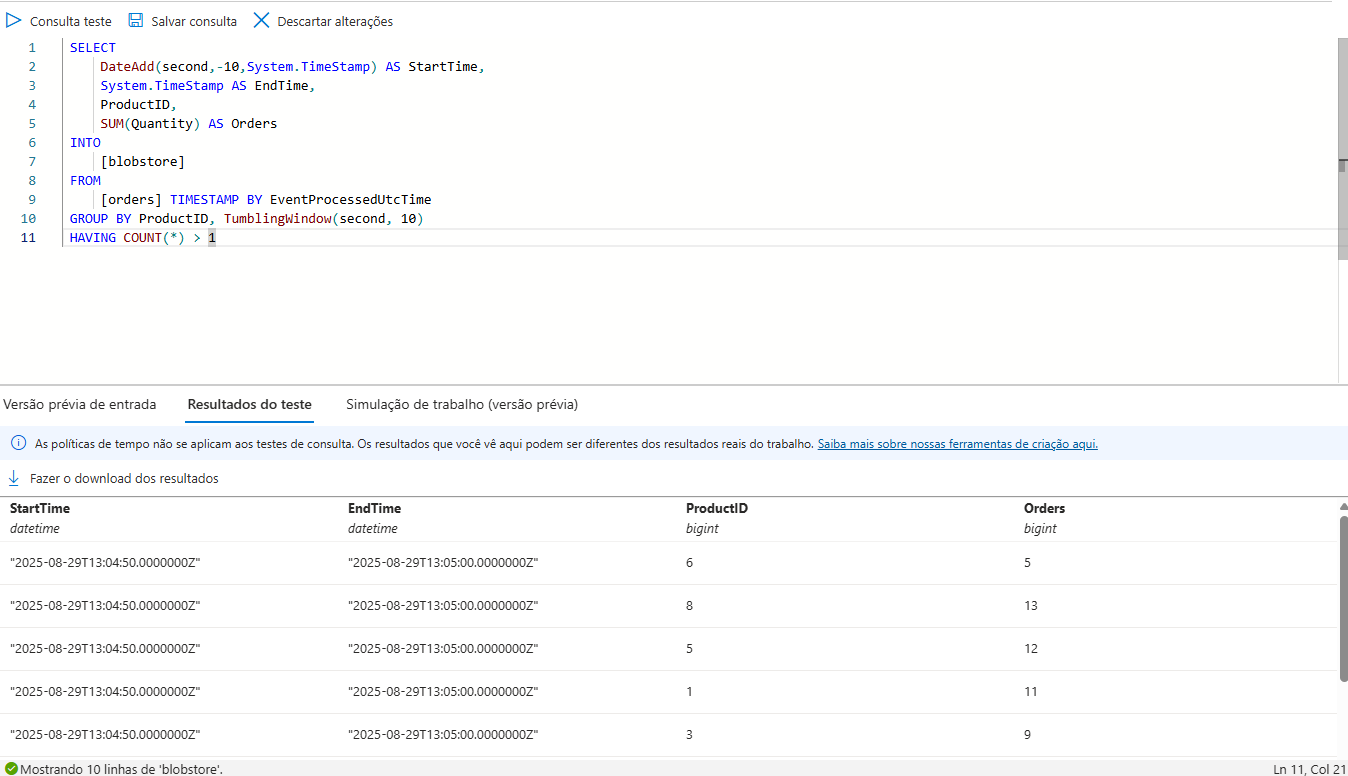

**Executar o trabalho de streaming**

Abra novamente o painel do Cloud Shell, reconectando-se se necessário e, em seguida, execute novamente o seguinte comando para enviar outros 1.000 pedidos.

In [ ]:
 node ~/dp-203/Allfiles/labs/17/orderclient

No contêiner de dados podemos ver o resultado no arquivo JSON:

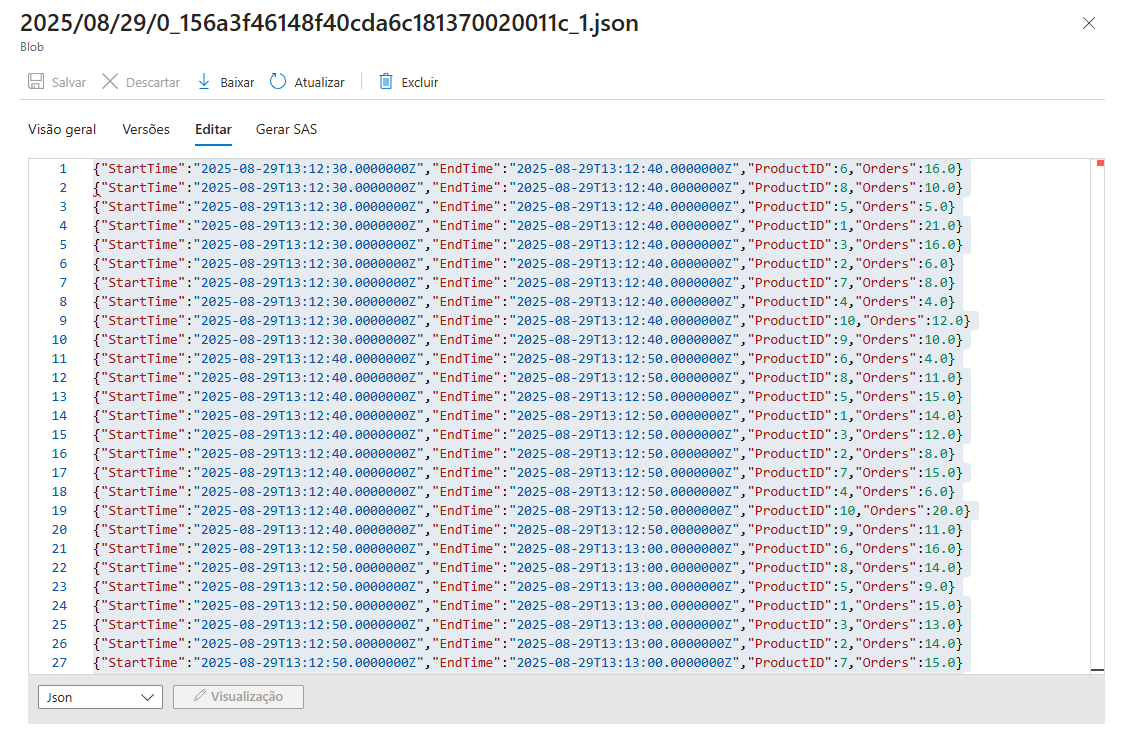